In [197]:
# Import libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\immor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Import dataset


tweets_df = pd.read_csv(r'D:\Downloads\twitter.csv')

tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
# Showing Statistics of dataset


tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
# Showing only "tweet" column


tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [17]:
# Finding any null values


tweets_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

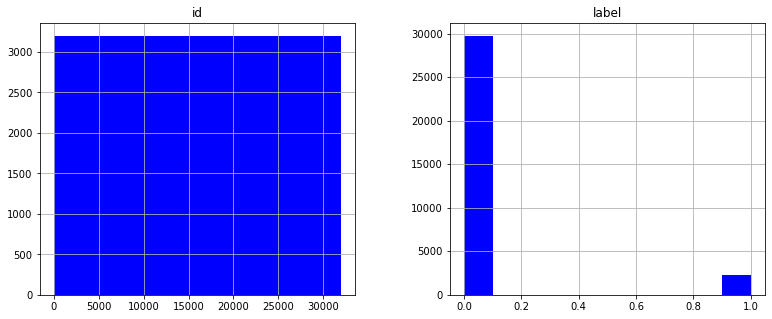

In [26]:
# Finding dsitrubtions using a graph


tweets_df.hist(figsize = (13,5), color = 'b')

<AxesSubplot:xlabel='label', ylabel='count'>

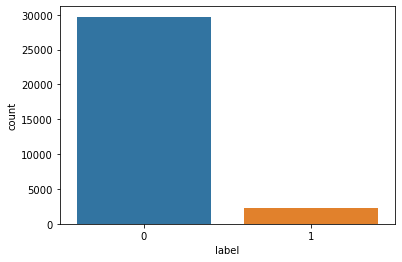

In [28]:
# Creating a seaborn countplot graph to show distrubtion of labels


sns.countplot(data = tweets_df, x = 'label')

In [30]:
# Showing exact count value of the different labels


tweets_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [34]:
# Creating a new column that shows the length of the tweets


tweets_df['length'] = tweets_df['tweet'].apply(len)

tweets_df

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

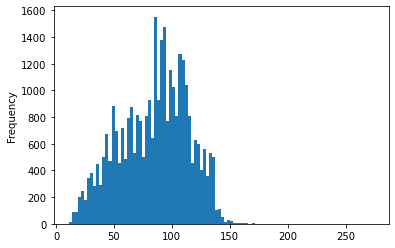

In [47]:
# Finding distribution of lengths


tweets_df['length'].plot(kind='hist', bins = 100)


# NOTES
# "bins" = set intervals

In [50]:
# Showing new statistics of dataframe


tweets_df.describe()

,id,label,length
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


In [53]:
# Finding the shortest message


tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [57]:
# Finding the shortest message


tweets_df[tweets_df['length']==85]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [61]:
# Creating what the label '0' means


positive = tweets_df[tweets_df['label']==0]

positive

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,61
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63


In [62]:
# Creating what the label '1' means


negative = tweets_df[tweets_df['label']==1]

negative

,id,label,tweet,length
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,31948,1,@user @user you don't have the balls to hashta...,112
31948,31949,1,"makes you ask yourself, who am i? then am i a...",87


In [84]:
# Testing to remove punctuations


test = "Good Morning, I am Carson :). You're doing great!"

test_punc_removed = [char for char in test if char not in string.punctuation]

test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'M',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'C',
 'a',
 'r',
 's',
 'o',
 'n',
 ' ',
 ' ',
 'Y',
 'o',
 'u',
 'r',
 'e',
 ' ',
 'd',
 'o',
 'i',
 'n',
 'g',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't']

In [85]:
# Joining characters to form string


test_punc_removed_joined = ' '.join(test_punc_removed)

test_punc_removed_joined

'G o o d   M o r n i n g   I   a m   C a r s o n     Y o u r e   d o i n g   g r e a t'

In [123]:
# making a funciton to remove punctuations


test = "Good Morning, I am Carson :). You're doing great!"

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    return text
         
    
remove_punct(test)

'Good Morning I am Carson  Youre doing great'

In [121]:
# Showing English stopwords


stopwords.words('english')



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [159]:
# making function to remove punc and stopwords


test = "Good Morning, I am Carson :). You're doing great!"

def clean_text(text):
    text = " ".join([word for word in text.split() if word.lower() not in stopwords.words('english')])
    text = "".join([char for char in text if char not in string.punctuation])
    return text.split()

remove_stopwords_punctuations(test)

['Good', 'Morning', 'Carson', 'great']

In [168]:
# Testing vectorization p1


sample_data = [
    'This is the first paper.',
    'This document is the second paper.',
    'And this is the third one.',
    'Is this the first paper?'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [169]:
# Testing vectorization p2


print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [201]:
# Vectorizing data in column, "tweet"


vectorizer = CountVectorizer(analyzer = clean_text)

tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

x = tweets_countvectorizer

y = tweets_df['label']




In [202]:
# Showing number of rows along x-axis


print(np.size(x,0))


31962


In [203]:
# Showing number of rows along y-axis


print(np.size(x,1))


47512


In [204]:
# Train a naive bayes classifier model


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [206]:
# Feeding array into naive bayes


NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

<AxesSubplot:>

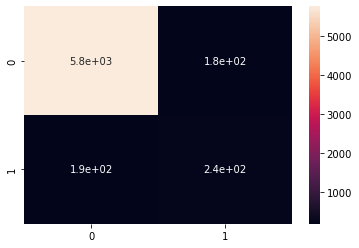

In [209]:
# Testing confusion matrix


y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [210]:
# Showing report


print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5957
           1       0.57      0.56      0.56       436

    accuracy                           0.94      6393
   macro avg       0.77      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

